In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvdWJ1bnR1L2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lzL2FkNjg4X2dyb3VwNl9nZW9ncmFwaGljX2FuYWx5c2lz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/usr/lib/python3.12/importlib/_bootstrap.py": 1755193641.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1755193641.0, "/usr/lib/python3.12/zipimport.py": 1755193641.0, "/usr/lib/python3.12/codecs.py": 1755193641.0, "/usr/lib/python3.12/encodings/aliases.py": 1755193641.0, "/usr/lib/python3.12/encodings/__init__.py": 1755193641.0, "/usr/lib/python3.12/encodings/utf_8.py": 1755193641.0, "/usr/lib/python3.12/abc.py": 1755193641.0, "/usr/lib/python3.12/io.py": 1755193641.0, "/usr/lib/python3.12/stat.py": 1755193641.0, "/usr/lib/python3.12/_collections_abc.py": 1755193641.0, "/usr/lib/python3.12/genericpath.py": 1755193641.0, "/usr/lib/python3.12/posixpath.py": 1755193641.0, "/usr/lib/python3.12/os.py": 1755193641.0, "/usr/lib/python3.12/_sitebuiltins.py": 1755193641.0, "/home/ubuntu/ad688_group6_geographic_analysis/.venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1760104492.1123328, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/sit

In [2]:
from pyspark.sql import SparkSession


# Start a Spark session
spark = SparkSession.builder.appName("JobPostingsAnalysis").getOrCreate()

# Load the CSV file into a Spark DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("../data/lightcast_job_postings.csv")


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/10/16 02:21:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


0    Merchandising, Mathematics, Presentations, Pre...
1    Procurement, Ficial Statements, Oracle Busines...
2    Management, Exception Reporting, Report Writin...
3    Exit Strategies, Reliability, User Story, Mana...
4                                                     
Name: ALL_SKILLS_RAW, dtype: object
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

                                   Frequency  count
0                              Communication   3394
1                 Sql (Programming Language)   3134
2                              Data Analysis   2960
3                                 Management   2116
4                                 Leadership   2023
5              Python (Programming Language)   1837
6                                  Dashboard   1791
7                            Problem Solving   1788
8                            Microsoft Excel   1771
9                           Sap Applications   1658
10                                Operations   1550
11                        Project Management   1528
12                          Business Process   1484
13                                      Fice   1437
14                     Business Requirements   1415
15                                  Planning   1211
16                             Presentations   1141
17                                   Writing   1120
18          

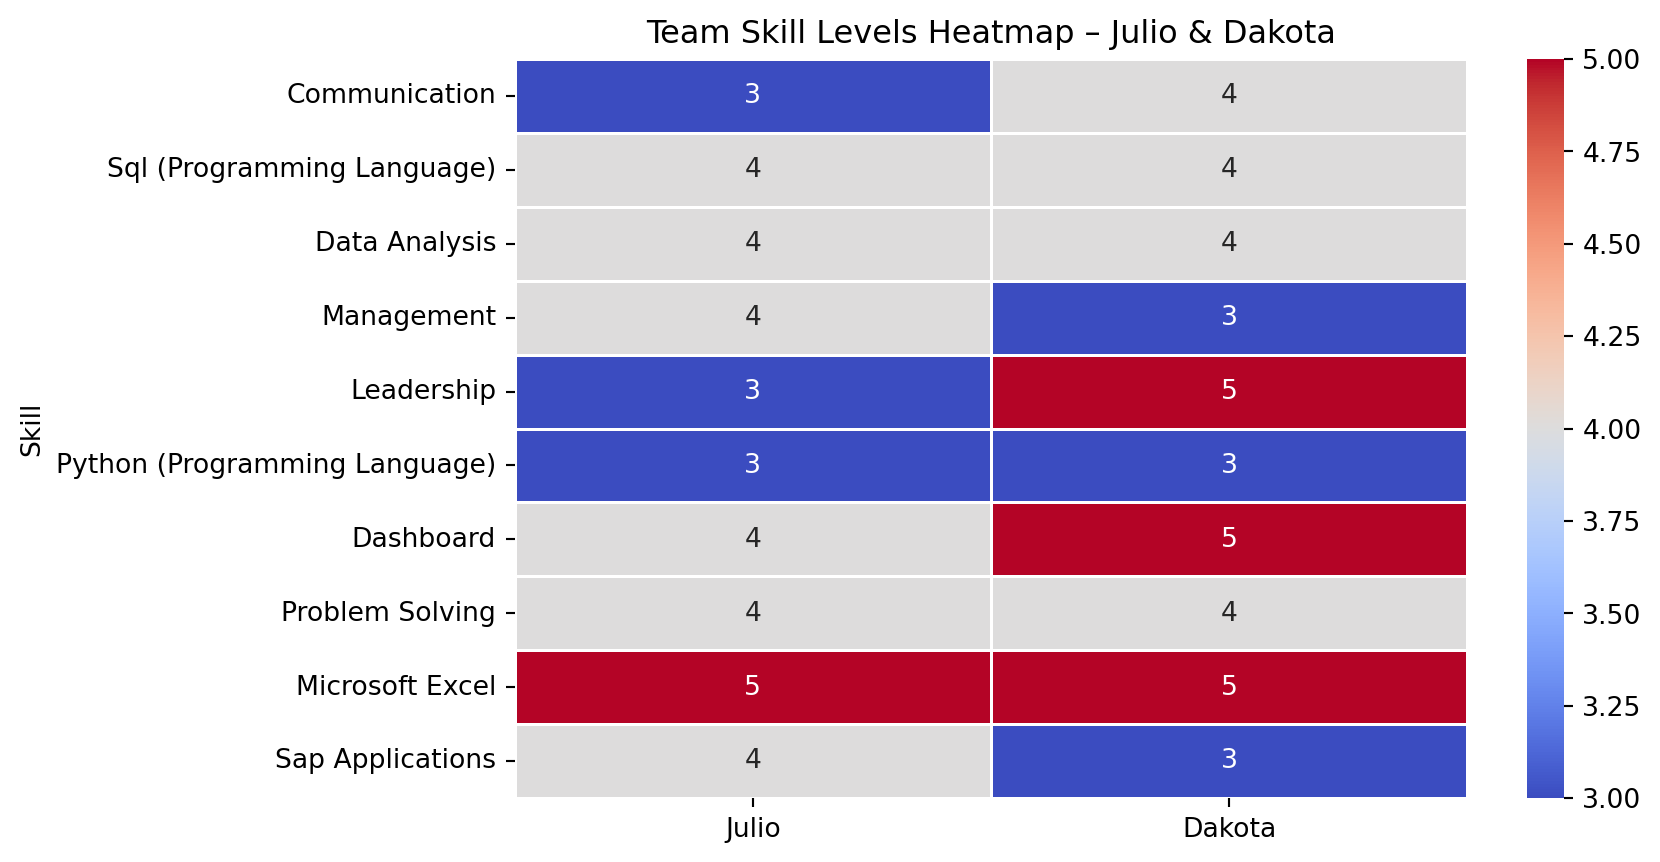

                           Skill  Julio  Dakota  Gap_Julio  Gap_Dakota
0                  Communication      3       4          2           1
1     Sql (Programming Language)      4       4          1           1
2                  Data Analysis      4       4          1           1
3                     Management      4       3          1           2
4                     Leadership      3       5          2           0
5  Python (Programming Language)      3       3          2           2
6                      Dashboard      4       5          1           0
7                Problem Solving      4       4          1           1
8                Microsoft Excel      5       5          0           0
9               Sap Applications      4       3          1           2


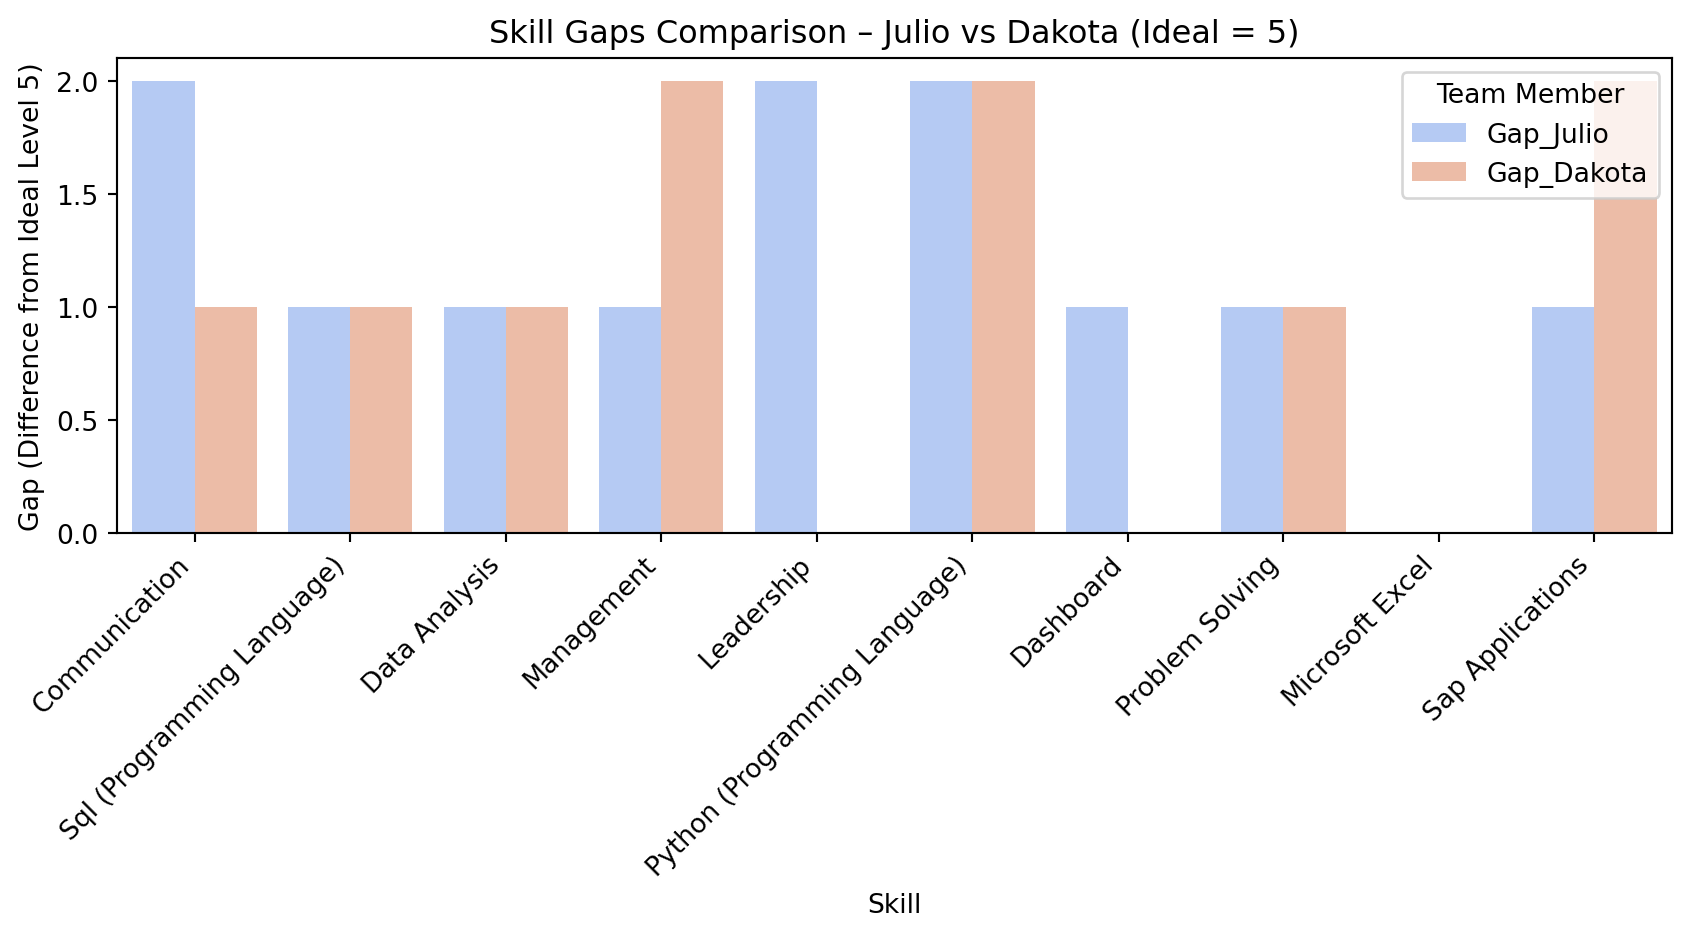

In [3]:
import pandas as pd

columns = [
    "COMPANY_NAME", "COMPANY_IS_STAFFING",              # Identification, company
    "POSTED", "EXPIRED", "DURATION", "MODELED_DURATION", # Dates, duration
    "TITLE_NAME", "EMPLOYMENT_TYPE_NAME", "IS_INTERNSHIP", # Job title, contract type
    "CITY_NAME", "STATE_NAME", "REMOTE_TYPE_NAME",       # Geographic
    "MIN_YEARS_EXPERIENCE", "MIN_EDULEVELS_NAME", "EDUCATION_LEVELS_NAME", # Education, experience
    "SALARY",                                             # Salary
    "SKILLS_NAME", "SPECIALIZED_SKILLS_NAME", "SOFTWARE_SKILLS_NAME", # Tech skills
    "COMMON_SKILLS_NAME",                                # Common, soft skills
    "CERTIFICATIONS_NAME"                                # Certif
]


df_columns = df.limit(4000).select([c for c in columns if c in df.columns])
df_columns_pd=df_columns.toPandas()

skill_cols = [
"SKILLS_NAME",
"SPECIALIZED_SKILLS_NAME",
"SOFTWARE_SKILLS_NAME",
"COMMON_SKILLS_NAME",
"CERTIFICATIONS_NAME"
]

df_columns_pd["ALL_SKILLS_RAW"] = df_columns_pd[skill_cols].fillna("").agg(" ".join, axis=1)
df_columns_pd["ALL_SKILLS_RAW"] = (
    df_columns_pd[skill_cols]
    .fillna("")
    .agg(" ".join, axis=1)
    .astype(str)
    .str.replace(r"[{}\[\]'\"]", "", regex=True)      # quita corchetes y comillas
    .str.replace(r"\b[Nn]one\b|nan", "", regex=True)  # quita None/nan
    .str.replace(r"[;|/]", ",", regex=True)           # normaliza separadores
    .str.replace(r"\s*,\s*", ", ", regex=True)        # limpia espacios entre comas
    .str.replace(r"\s{2,}", " ", regex=True)          # elimina espacios dobles
    .str.strip()                                      # quita espacios extra
)
print(df_columns_pd["ALL_SKILLS_RAW"].head(5))
pd.set_option('display.max_colwidth', None); print(df_columns_pd["ALL_SKILLS_RAW"].head(5).to_string(index=False))



# skills text to list.
df_columns_pd["ALL_SKILLS_LIST"] = df_columns_pd["ALL_SKILLS_RAW"].str.split(",")

# list to row
df_skills = df_columns_pd.explode("ALL_SKILLS_LIST")

# Clean up spaces and drop empty rows
df_skills = ( df_skills.dropna(subset=["ALL_SKILLS_LIST"]).loc[df_skills["ALL_SKILLS_LIST"].str.strip() != ""])
df_skills["ALL_SKILLS_LIST"] = ( df_skills["ALL_SKILLS_LIST"] .str.strip() .str.title())

# Count skills
top_skills = (df_skills["ALL_SKILLS_LIST"].value_counts().reset_index().rename(columns={"index": "Skill", "ALL_SKILLS_LIST": "Frequency"}))

# Show top 20
print(top_skills.head(20))

#                                    Frequency  count
# 0                              Communication   3394
# 1                 Sql (Programming Language)   3134
# 2                              Data Analysis   2960
# 3                                 Management   2116
# 4                                 Leadership   2023
# 5              Python (Programming Language)   1837
# 6                                  Dashboard   1791
# 7                            Problem Solving   1788
# 8                            Microsoft Excel   1771
# 9                           Sap Applications   1658
# 10                                Operations   1550
# 11                        Project Management   1528
# 12                          Business Process   1484



# 5 expert, 4 Advanced, 3 Intermediate, 2 Basic Knowledge, 1
top10_skills = [
    "Communication",
    "Sql (Programming Language)",
    "Data Analysis",
    "Management",
    "Leadership",
    "Python (Programming Language)",
    "Dashboard",
    "Problem Solving",
    "Microsoft Excel",
    "Sap Applications"
]

skills_data = {
    "Skill": top10_skills,
    "Julio": [3, 4, 4, 4, 3, 3, 4, 4, 5, 4],
    "Dakota": [4, 4, 4, 3, 5, 3, 5, 4, 5, 3]
}

df_team = pd.DataFrame(skills_data)
df_team


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df_team.set_index("Skill"), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Team Skill Levels Heatmap – Julio & Dakota")
plt.show()

# SKILL GAP (Ideal vs our skills)
df_team["Gap_Julio"] = 5 - df_team["Julio"]
df_team["Gap_Dakota"] = 5 - df_team["Dakota"]

# SHOT SKILLS
print(df_team[["Skill", "Julio", "Dakota", "Gap_Julio", "Gap_Dakota"]])


import matplotlib.pyplot as plt
import seaborn as sns

#Melt AND PLOT GAP
df_gaps_melted = df_team.melt(
    id_vars="Skill",
    value_vars=["Gap_Julio", "Gap_Dakota"],
    var_name="Member",
    value_name="Gap"
)

plt.figure(figsize=(9,5))
sns.barplot(data=df_gaps_melted, x="Skill", y="Gap", hue="Member", palette="coolwarm")
plt.title("Skill Gaps Comparison – Julio vs Dakota (Ideal = 5)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Gap (Difference from Ideal Level 5)")
plt.xlabel("Skill")
plt.legend(title="Team Member")
plt.tight_layout()
plt.show()
